In [1]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv('C:/Users/Xueho/Projects/Machine_learning_projects/Raw_data/dc_airbnb.csv')
dc_listings.head(1)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC


#### A simple prediction using 5 nearest neighbors

In [2]:
# K-Nearest Neighbors strategy:
#    Find a few similar listings.
#    Calculate the average nightly rental price of these listings.
#    Set the average price as the price for our listing.
first_distance = abs(dc_listings.iloc[0]['accommodates']-3)  # Euclidean distance 
print(first_distance)

1


In [3]:
first_distance = dc_listings['accommodates'] - 3
dc_listings['distance'] = first_distance.apply(abs)
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


Randomize rows

In [4]:
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


In [5]:
stripped = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)
dc_listings['price'] = stripped
mean_price = dc_listings['price'].head().mean()
print(mean_price)

156.6


In [6]:
# function below calculates the suggested price for any value using k-nearest neighbors ML technique for accommodates
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df['price'].head()
    predicted_price = nearest_neighbors.mean()
    return predicted_price
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_three = predict_price(3)
acc_four = predict_price(4)
print(acc_one)
print(acc_two)
print(acc_three)
print(acc_four)

78.8
126.0
194.8
197.6


#### Evaluating Model Performance

In [7]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv('C:/Users/Xueho/Projects/Machine_learning_projects/Raw_data/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings['price'] = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return predicted_price

predicted_price = test_df['accommodates'].apply(predict_price)
print(predicted_price.value_counts())

247.8     399
447.8     153
245.4     115
138.8      97
1109.8     75
1380.0     47
1154.2     45
Name: accommodates, dtype: int64


In [8]:
error = np.absolute(predicted_price - test_df['price'])
mae = error.mean()
se = (predicted_price - test_df['price'])**2
mse = se.mean()
print(mae, '    ', mse)

302.72996777658005      191008.2583888297


In [9]:
predicted_price = test_df['bathrooms'].apply(lambda x: predict_price(x))
squared_error = (predicted_price - test_df['price'])**2
mse = squared_error.mean()
rmse = mse**0.5
print(mse, '   ', rmse)

17118.98943071955     130.83955606283428


In [10]:
# differnt effects of error on mse and rmse 
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = errors_one.mean()
rmse_one = (sum((x**2 for x in errors_one))/len(errors_one))**0.5
mae_two = errors_two.mean()
rmse_two = (sum((x**2 for x in errors_two))/len(errors_two))**0.5
print(mae_one, '  ', mae_two, '  ', rmse_one, '  ', rmse_two)

7.5    62.5    7.905694150420948    235.82302686548658


#### Multivariate K-Nearest Neighbors

In [11]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis = 1)
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [12]:
dc_listings = dc_listings.drop(['cleaning_fee', 'security_deposit'], axis=1)
dc_listings = dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [13]:
normalized_listings = (dc_listings - dc_listings.mean()) / (dc_listings.std())
normalized_listings['price'] = dc_listings['price']
normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
1485,-0.596544,-0.249467,-0.439151,-0.546858,110.0,1.869317,-0.016594,0.543608
2760,-0.596544,0.939875,-0.439151,0.297345,500.0,-0.341375,-0.016573,-0.516709
1253,-0.596544,-0.249467,-0.439151,-0.546858,95.0,-0.341375,-0.016573,-0.003652


In [ ]:
from scipy.spatial import distance
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
print(first_fifth_distance)

```
The scikit-learn workflow:
    1. instantiate the specific machine learning model,
    2. fit the model to the training data,
    3. use the model to make predictions,
    4. evaluate the accuracy of the predictions.
    
calling the constructor to instantiate an empty model 
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor() 
        defaults: n_neighbors=5, p=2, algorithm='auto' tree-based optimizations to improve performance)```

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm = 'brute')
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_features = train_df[['accommodates', 'bathrooms']]
train_target = train_df['price']
knn.fit(train_features, train_target)
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [ ]:
# Use two columns to train a k-nearest neighbors model 
from sklearn.metrics import mean_squared_error
train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])
two_features_mse = mean_squared_error(test_df['price'], predictions)
two_features_rmse = two_features_mse ** 0.5
print(two_features_mse, ' ', two_features_rmse)

In [ ]:
# Use four columns to train a k-nearest neighbors model 
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'] , four_predictions)
four_rmse = four_mse ** 0.5
print(four_mse, '  ', four_rmse)

In [ ]:
# Use all of the columns except the price column to train a k-nearest neighbors model 
features = train_df.columns.tolist()
features.remove('price')
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)
all_features_rmse = four_mse ** 0.5
print(all_features_mse, '  ', all_features_rmse)

#### Hyperparameter Optimization

In [51]:
import pandas as pd
train_df = pd.read_csv('C:/Users/Xueho/Projects/Machine_learning_projects/Raw_data/dc_airbnb_train.csv')
test_df = pd.read_csv('C:/Users/Xueho/Projects/Machine_learning_projects/Raw_data/dc_airbnb_test.csv')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
hyper_params = [1,2,3,4,5]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475]


```
Varying the k value affects the behavior of the model independently of the actual data that's used when making predictions.
Hyperparameters: values that affect the behavior and performance of a model unrelated to the data used.
Grid search: a simple but common hyperparameter optimization technique. ```

In [52]:
hyper_params = [x for x in range(1,21)]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm = 'brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475, 13495.78156996587, 14209.360474565252, 14615.818988196814, 14591.371971516453, 14608.888509670078, 14747.643537453343, 14802.514876437872, 14726.607851848858, 14788.004486777645, 14775.071925167487, 14846.632372546928, 14801.420334526101, 14761.434233626876, 14750.644695086017, 14653.391259954493]


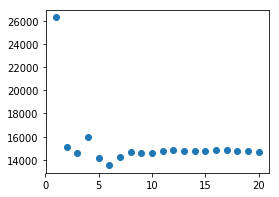

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.scatter(hyper_params, mse_values)

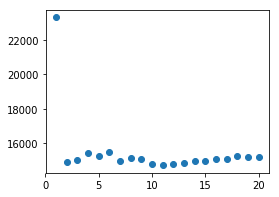

In [54]:
# Use all of the columns except the price column to train a k-nearest neighbors model 
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns
features = features.drop('price')
for i in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=i, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
plt.figure(figsize=(4,3))
plt.scatter(hyper_params, mse_values)

In [55]:
# find lowest MSE value
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
two_mse_values = []
three_mse_values = []
two_hyp_mse = {}
three_hyp_mse = {}

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)
    
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1
for k, mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
                            
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1
for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1
        
two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse, three_hyp_mse)  

{5: 14790.314266211606} {7: 13518.769009310208}


#### Cross Validation

```
holdout validation technique:
    1. splitting the full dataset into 2 partitions:
        a training set
        a test set
    2. training the model on the training set,
    3. using the trained model to predict labels on the test set,
    4. computing an error metric to understand the model's effectiveness,
    5. switch the training and test sets and repeat,
    6. average the errors.  ```


In [56]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv('C:/Users/Xueho/Projects/Machine_learning_projects/Raw_data/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings['price'] = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype('float')
dc_listings = dc_listings.reindex(np.random.permutation(dc_listings.index))
split_one = dc_listings[:1862]
split_two = dc_listings[1862:]

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
# First half
model = KNeighborsRegressor()
model.fit(train_one[["accommodates"]], train_one["price"])
test_one_predicted_price = model.predict(test_one[["accommodates"]])
iteration_one_rmse = mean_squared_error(test_one["price"], test_one_predicted_price)**(1/2)

# Second half
model.fit(train_two[["accommodates"]], train_two["price"])
test_two_predicted_price = model.predict(test_two[["accommodates"]])
iteration_two_rmse = mean_squared_error(test_two["price"], test_two_predicted_price)**(1/2)

avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])
print(iteration_one_rmse, ' ', iteration_two_rmse, ' ' , avg_rmse)

152.41215713363513   127.63290337381856   140.02253025372684


````
Holdout validation is a specific example of a larger class of validation techniques called k-fold cross-validation
k-fold cross validation algorithm:
    1. splitting the full dataset into k equal length partitions.
        selecting k-1 partitions as the training set and
        selecting the remaining partition as the test set
    2. training the model on the training set.
    3. using the trained model to predict labels on the test fold.
    4. computing the test fold's error metric.
    5. repeating k-1 times, until each partition has been used as the test set for an iteration.
    6. calculating the mean of the k error values. ```


In [58]:
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5
dc_listings['fold'].value_counts()
dc_listings['fold'].value_counts(dropna=False)

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Training
model = KNeighborsRegressor()
train_iteration_one = dc_listings[dc_listings["fold"] != 1]
test_iteration_one = dc_listings[dc_listings["fold"] == 1].copy()
model.fit(train_iteration_one[["accommodates"]], train_iteration_one["price"])
# Predicting
labels = model.predict(test_iteration_one[["accommodates"]])

iteration_one_mse = mean_squared_error(test_iteration_one["price"], labels)
iteration_one_rmse = iteration_one_mse ** 0.5
print(iteration_one_rmse)

113.8156621014758


In [29]:
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold].copy()
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**0.5
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)
avg_rmse = np.mean(rmses)
print(avg_rmse)

[110.39750434879836, 153.6217430779534, 141.65710075230393, 128.35327781062384, 138.9547030631051]
134.59686581055692


```
Improve k-nearest neighbors model by changing the features it uses or tweaking the number of neighbors (a hyperparameter). To accurately understand a model's performance, perform k-fold cross validation and select the proper number of folds. 

kf = KFold(n_splits, shuffle=False, random_state=None)
    n_splits: the number of folds you want to use,
    shuffle: used to toggle shuffling of the ordering of the observations in the dataset,
    random_state: used to specify the random seed value if shuffle is set to True.

cross_val_score(estimator, X, Y, scoring=None, cv=None)
    estimator: a sklearn model that implements the fit method (e.g. instance of KNeighborsRegressor),
    X: the list or 2D array containing the features you want to train on,
    y: a list containing the values you want to predict (target column),
    scoring: a string describing the scoring criteria (list of accepted values here).
    cv: describes the number of folds. Here are some examples of accepted values:
```

In [63]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn, dc_listings[['accommodates']], dc_listings['price'], scoring=None, cv=kf)
rmse = np.abs(mses)**0.5
avg_rmse = np.mean(rmse)
print(mses)
print(avg_rmse)

[ 0.17327386  0.16867559  0.08629549  0.16746917 -0.23922611]
0.403812295291301


In [34]:
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "  std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  133.52982603262805   std RMSE:  11.300975105818855
5 folds:  avg RMSE:  131.60618190486184   std RMSE:  31.27301525823709
7 folds:  avg RMSE:  128.49489356268225   std RMSE:  29.19229901264576
9 folds:  avg RMSE:  129.16034699799246   std RMSE:  30.368867515043068
10 folds:  avg RMSE:  130.44751272170947   std RMSE:  36.54457141462621
11 folds:  avg RMSE:  131.1289410158355   std RMSE:  31.850775915656914
13 folds:  avg RMSE:  127.20444149540269   std RMSE:  38.382619376970744
15 folds:  avg RMSE:  133.63720064282768   std RMSE:  40.226858034237395
17 folds:  avg RMSE:  124.26308219439494   std RMSE:  37.264587141839655
19 folds:  avg RMSE:  124.0656364400497   std RMSE:  41.796725187433836
21 folds:  avg RMSE:  126.8280606882898   std RMSE:  41.788865741664814
23 folds:  avg RMSE:  122.72318116849858   std RMSE:  40.79219264799168
